In [1]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_norm.mat")
deltaBio = data['deltaBio']
deltaNcs = data['deltaNcs']

delta = data['delta2']

scale = data['scale2_n'].ravel()

print(scale.shape)
featureName0=['VarBR','Varpp','VarIn','VarEx', 'meanBR',\
             'meanIn', 'meanEx' ,'BRcor1','ppcor1','Incor1','Excor1','BRcor3','ppcor3','Incor3','Excor3',\
            'meanHR','sdnn','rmsrr']
featureName=['CovBR','CovPP','CovIN','CovEX', 'meanBR',\
             'meanIN', 'meanEX' ,'r1 BR','r1 PP','r1 IN','r1 EX','r2 BR','r2 PP','r2 IN','r2 EX',\
            'meanHR','sdnn','rmsrr']
#scale=np.array([3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 1 ,2])
#scale=np.array([3, 3, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 1 ,2])


(88,)


In [2]:


rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=None)

acc1=[]
impt=[]
for train_ind, test_ind in rkf.split(delta,scale):
    #print("%s %s" % (train_ind, test_ind))
    #print(test_ind)
    X_train=delta[train_ind] 
    X_test=delta[test_ind]
    y_train=scale[train_ind] 
    y_test=scale[test_ind]

    acc_temp=np.zeros((3,))
    acc_temp=np.zeros((3,))
    impt_temp=np.zeros((3,18))
    for i in range(3):
        
        tree = RandomForestClassifier(max_depth=8,n_estimators=40,max_features=None).fit(X_train,y_train)
        y_p=tree.predict(X_test)
        acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/3
        acc_temp[i]=np.mean(acc_t)
        impt_temp[i,:]=tree.feature_importances_


    max=np.max(acc_temp)
    ind=np.where(acc_temp == np.amax(acc_temp))
    ind=np.min(ind)
    impt_max=impt_temp[ind,:]
    acc1.append(max) 

    impt.append(impt_max)
impt=np.array(impt) 
importance1=np.mean(impt,axis=0)
seq=np.argsort(importance1)
featureName=np.array(featureName)
featureName1=featureName[seq]
importance1=importance1[seq]
importance1=np.flip(importance1)
featureName1=np.flip(featureName1)
#print(acc)
acc1=np.array(acc1)
acc1_mean=np.mean(acc1)
print(acc1_mean)
#classNames=['norm','weak','moderate','severe']

print(importance1)
print(featureName1)


0.9213289760348584
[0.1732735  0.12908206 0.09704178 0.07151029 0.06621521 0.06037487
 0.06018953 0.05685715 0.04195841 0.03754956 0.03496515 0.03334389
 0.03085442 0.02997819 0.02494715 0.02062877 0.01697968 0.0142504 ]
['r1 BR' 'meanHR' 'r2 BR' 'r1 IN' 'rmsrr' 'r1 PP' 'r1 EX' 'meanBR' 'sdnn'
 'r2 EX' 'meanEX' 'CovIN' 'r2 IN' 'CovEX' 'CovBR' 'meanIN' 'r2 PP' 'CovPP']


In [3]:
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=None)
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data_wo.mat")
delta_wo = data['delta2']
scale_wo = data['scale2_n'].ravel()


rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=None)
acc2=[]
impt=[]
for train_ind, test_ind in rkf.split(delta_wo ,scale_wo):
    #print("%s %s" % (train_ind, test_ind))
    #print(test_ind)
    X_train=delta_wo [train_ind] 
    X_test=delta_wo [test_ind]
    y_train=scale_wo [train_ind] 
    y_test=scale_wo [test_ind]
    
    acc_temp=np.zeros((8,))
    impt_temp=np.zeros((8,18))
    for i in range(8):
        
        tree = RandomForestClassifier(max_depth=10,n_estimators=50,max_features=None).fit(X_train,y_train)
        y_p=tree.predict(X_test)
        acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/2
        acc_temp[i]=np.mean(acc_t)
        impt_temp[i,:]=tree.feature_importances_


    max=np.max(acc_temp)
    ind=np.where(acc_temp == np.amax(acc_temp))
    ind=np.min(ind)
    impt_max=impt_temp[ind,:]
    acc2.append(max) 

    impt.append(impt_max)
impt=np.array(impt) 
importance2=np.mean(impt,axis=0)
seq=np.argsort(importance2)
featureName=np.array(featureName)
featureName2=featureName[seq]
importance2=importance2[seq]
importance2=np.flip(importance2)
featureName2=np.flip(featureName2)
#print(acc)
acc2=np.array(acc2)
acc2_mean=np.mean(acc2)
print(acc2_mean)
#classNames=['norm','weak','moderate','severe']

print(importance2)
print(featureName2)

0.9400757575757575
[0.35584961 0.18478852 0.08659736 0.07369238 0.05978894 0.0517131
 0.02974197 0.02764567 0.02262904 0.0225033  0.0159959  0.01228477
 0.01080793 0.01029815 0.01000194 0.00909256 0.00903445 0.00753441]
['r1 BR' 'r2 BR' 'r1 IN' 'r1 EX' 'CovIN' 'r2 EX' 'r2 IN' 'sdnn' 'CovBR'
 'rmsrr' 'CovEX' 'meanEX' 'meanBR' 'r2 PP' 'r1 PP' 'meanHR' 'CovPP'
 'meanIN']


In [4]:
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=None)
acc3=[]
impt=[]
data = sio.loadmat(r"C:\Sleep test\dyspnea\data\all\data01.mat")
feat = data['feat2']
scale_feat = data['scale2_n'].ravel()


for train_ind, test_ind in rkf.split(feat,scale_feat):
    #print("%s %s" % (train_ind, test_ind))
    #print(scale[test_ind])
    X_train=feat[train_ind] 
    X_test=feat[test_ind]
    y_train=scale_feat[train_ind] 
    y_test=scale_feat[test_ind]
    
    acc_temp=np.zeros((5,))
    acc_temp=np.zeros((5,))
    impt_temp=np.zeros((5,18))
    for i in range(5):
        
        tree = RandomForestClassifier(max_depth=10,n_estimators=50,max_features=None).fit(X_train,y_train)
        y_p=tree.predict(X_test)
        acc_t = 1-abs(y_p.astype('int')-y_test.astype('int'))/3
        acc_temp[i]=np.mean(acc_t)
        impt_temp[i,:]=tree.feature_importances_


    max=np.max(acc_temp)
    ind=np.where(acc_temp == np.amax(acc_temp))
    ind=np.min(ind)
    impt_max=impt_temp[ind,:]
    acc3.append(max) 

    impt.append(impt_max)
impt=np.array(impt) 
importance3=np.mean(impt,axis=0)
seq=np.argsort(importance3)
featureName=np.array(featureName)
featureName3=featureName[seq]
importance3=importance3[seq]
importance3=np.flip(importance3)
featureName3=np.flip(featureName3)
#print(acc)
acc3=np.array(acc3)
acc3_mean=np.mean(acc3)
print(acc3_mean)
#classNames=['norm','weak','moderate','severe']

print(importance3)
print(featureName3)


0.865119825708061
[0.19555192 0.12013335 0.10315849 0.07965293 0.05729098 0.05001042
 0.04231524 0.03942    0.03864382 0.03819622 0.03598052 0.03453582
 0.03418786 0.0285113  0.02819864 0.02668671 0.02634054 0.02118522]
['rmsrr' 'meanHR' 'sdnn' 'CovBR' 'meanBR' 'r2 PP' 'meanEX' 'r1 IN' 'r2 IN'
 'r1 BR' 'meanIN' 'CovPP' 'CovIN' 'CovEX' 'r2 EX' 'r1 EX' 'r2 BR' 'r1 PP']


acc1_mean=0.921
FeatureImportance1:
r1 BR=0.173
meanHR=0.129
r2 BR=0.097
r1 IN=0.072
acc2_mean=0.94
FeatureImportance2:
r1 BR=0.356
r2 BR=0.185
r1 IN=0.087
r1 EX=0.074
acc3_mean=0.87
FeatureImportance3:
rmsrr=0.196
meanHR=0.120
sdnn=0.103
CovBR=0.080


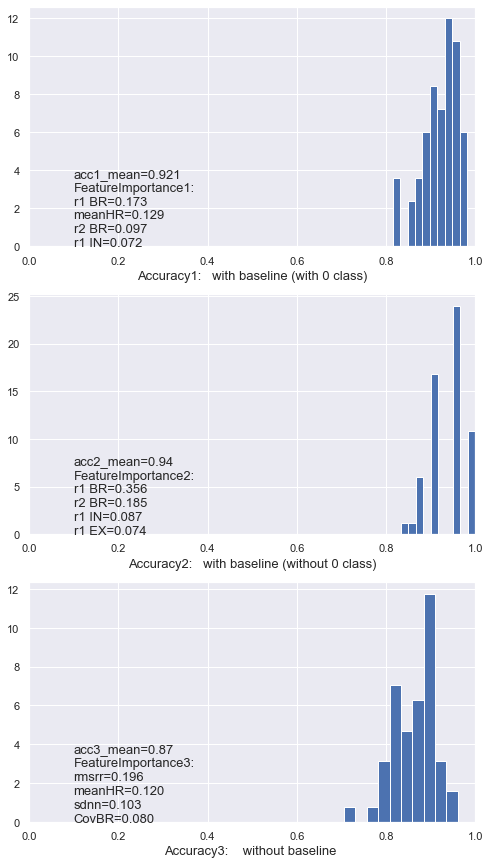

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={"figure.figsize": (8, 15)}); np.random.seed(0)
size=13
s1='acc1_mean={n:.3f}\nFeatureImportance1:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.format(n=acc1_mean,n1=featureName1[0],s1=importance1[0],
    n2=featureName1[1],s2=importance1[1],n3=featureName1[2],s3=importance1[2],n4=featureName1[3],s4=importance1[3])
s2='acc2_mean={n:.2f}\nFeatureImportance2:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.format(n=acc2_mean,n1=featureName2[0],s1=importance2[0],
    n2=featureName2[1],s2=importance2[1],n3=featureName2[2],s3=importance2[2],n4=featureName2[3],s4=importance2[3])
s3='acc3_mean={n:.2f}\nFeatureImportance3:\n{n1}={s1:.3f}\n{n2}={s2:.3f}\n{n3}={s3:.3f}\n{n4}={s4:.3f}'.format(n=acc3_mean,n1=featureName3[0],s1=importance3[0],
    n2=featureName3[1],s2=importance3[1],n3=featureName3[2],s3=importance3[2],n4=featureName3[3],s4=importance3[3])
plt.figure(1)
plt.subplot(3,1,1)
plt.hist(acc1, density=True)
plt.xlim((0, 1))
plt.xlabel('Accuracy1:   with baseline (with 0 class)',fontsize=size)
plt.text(0.1,0,s1,fontsize=size)
plt.subplot(3,1,2)
plt.hist(acc2, density=True)
plt.xlim((0, 1))
plt.xlabel('Accuracy2:   with baseline (without 0 class)',fontsize=size)
plt.text(0.1,0,s2,fontsize=size)
plt.subplot(3,1,3)
plt.hist(acc3, density=True)
plt.xlim((0, 1))
plt.xlabel('Accuracy3:    without baseline ',fontsize=size )
plt.text(0.1,0,s3,fontsize=size)

plt.savefig(r"C:\Sleep test\dyspnea\data\all\plot\acc_forest.png",dpi=300)
print(s1)
print(s2)
print(s3)